# **Polynomial Regression**

In questo esempio viene mostrato come eseguire regressione polinomiale. I comandi utilizzati sono analoghi a quelli per la regressione lineare. Tuttavia, i dati vengono trattati come polinomi utilizzando la classe `PolynomialFeatures`. Le prestazioni del modello vengono valutate tramite le metriche di errore quadratico medio (MSE) e root mean square error (RMSE). 

**Importazione delle librerie necessarie**

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

**Generazione dei dati**

Si utilizza la funzione `arange` di NumPy per generare un array di 30 valori per la variabile indipendente `x` e un array di dati noti per la variabile dipendente `y`.

In [3]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

**Generazione delle caratteristiche polinomiali**

Utilizziamo la classe `PolynomialFeatures` di scikit-learn per creare le caratteristiche polinomiali delle variabili indipendenti. L'obiettivo della regressione polinomiale è quello di descrivere la relazione tra la variabile `x` ed `y` tramite un polinomio di grado `n` (in questo esempio `n=15`, argomento `degree`).

In [4]:
poly = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly.fit_transform(x.reshape(-1, 1))

**Creazione training set e test set**

Si utilizza la funzione `train_test_split` riservando 20% del dataset come test.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=1)

**Addestramento del modello**

Si utilizza la classe `LinearRegression` per creare un modello di regressione lineare e il metodo `fit` per addestrarlo sui dati di training.

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Valutazione delle prestazioni del modello**

In [7]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 65.58928858848627
Root Mean Squared Error: 8.098721416895772


**Visualizzazione risultati**

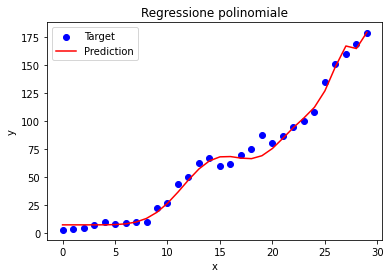

In [12]:
plt.scatter(x, y, color='blue', label='Target')
plt.plot(x, model.predict(v), color='red', label="Prediction")
plt.title('Regressione polinomiale')
plt.xlabel('x')
plt.ylabel('y')
# Per impostare un range negli assi 
# ax = plt.gca()
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
plt.legend()
plt.show()

**Confronto tra polinomi di diverso grado**

Esercizio: provare a ripetere l'esempio utilizzando valori diversi per l'argomento `degree` della classe `PolynomialFeatures`.
Graficare poi i risultati e calcolare le relative performance in termini di MSE e RMSE.

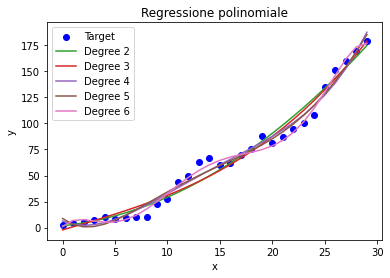

In [43]:
plt.clf()
plt.scatter(x, y, color='blue', label='Target')
plt.title('Regressione polinomiale')
plt.xlabel('x')
plt.ylabel('y')

available_colors = list(mcolors.TABLEAU_COLORS.values())

for degree in range(2,7):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=1)
   
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    plt.plot(x, 
             model.predict(poly.fit_transform(x.reshape(-1, 1))), 
             color=available_colors[degree % len(available_colors)], label=f"Degree {degree}"
            )

plt.legend()
plt.show()